# CUSTOMER SEGMENTATION 

#### Importing all required libraries.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### We import the data as a .csv file using pandas and create a DataFrame named 'cust'.

In [9]:
cust = pd.read_csv('Mall_Customers.csv')

#### Next, we observe the contents of our DataFrame.

In [10]:
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Now, we check whether our data needs cleaning. For that, we plot a heatmap of our entire dataset, highlighting all null values (if any).

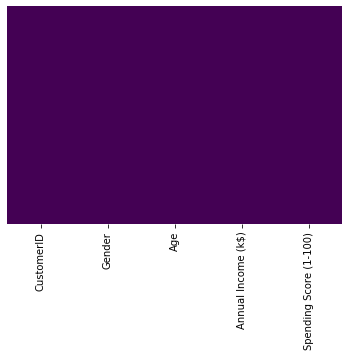

In [13]:
sns.heatmap(cust.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#### It is seen from the heatmap that our data doesn't have null values. So now we can proceed with our dummy variables. Before that, we set the Customer ID as the index.

In [14]:
cust = cust.set_index('CustomerID')

In [15]:
cust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


#### Creating a dummy variable for the Gender column.

In [16]:
sex = pd.get_dummies(cust['Gender'], drop_first = True)
sex.head()

,Male
CustomerID,
1,1
2,1
3,0
4,0
5,0


#### Then we concatenate the two DataFrames to form one DataFrame and drop the Gender column as it is no longer required.

In [17]:
cust = pd.concat([cust,sex], axis =1)

In [18]:
cust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [19]:
cust.drop(['Gender'], axis = 1, inplace = True)

In [20]:
cust.head()


,Age,Annual Income (k$),Spending Score (1-100),Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


#### We change the column names for ease of access.

In [21]:
cust = cust.rename(columns = {'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Scr'})
cust.head()

,Age,Annual Income,Spending Scr,Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


## EXPLORATORY DATA ANALYSIS

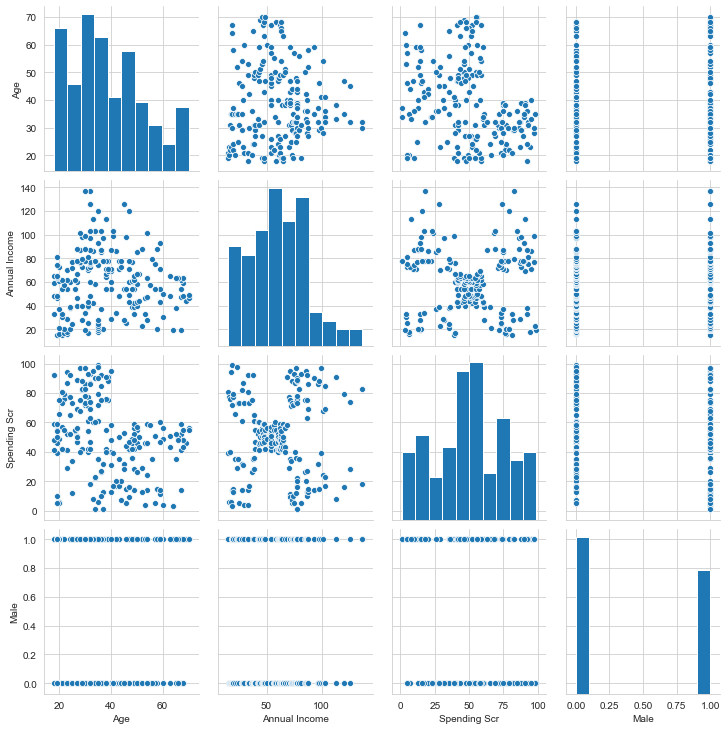

In [22]:
sns.set_style('whitegrid')
sns.pairplot(cust)

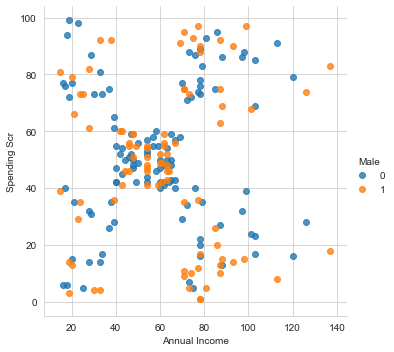

In [23]:
sns.lmplot(x = 'Annual Income', y = 'Spending Scr', data = cust, fit_reg = False, hue = 'Male' )

#### From the above lineplot we can see that males and females are almost equally distributed in all the clusters.

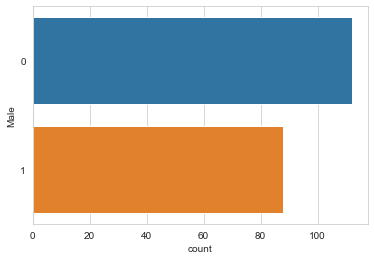

In [24]:
sns.countplot(y = 'Male', data = cust)

#### Now we plot distribution plots with KDE to see the distribution of the features.

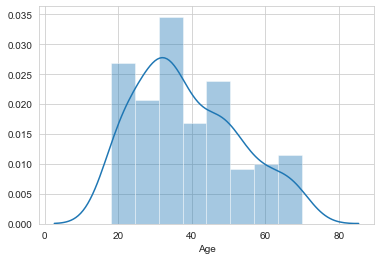

In [25]:
sns.distplot(cust['Age'])

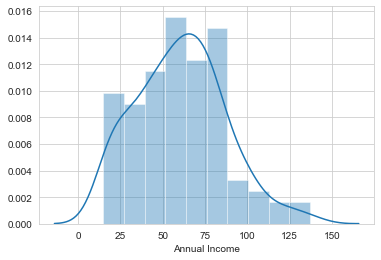

In [26]:
sns.distplot(cust['Annual Income'])

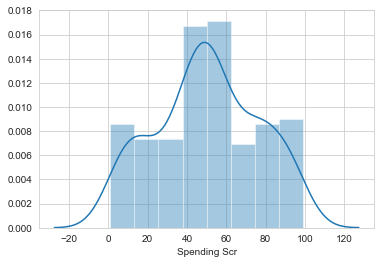

In [27]:
sns.distplot(cust['Spending Scr'])

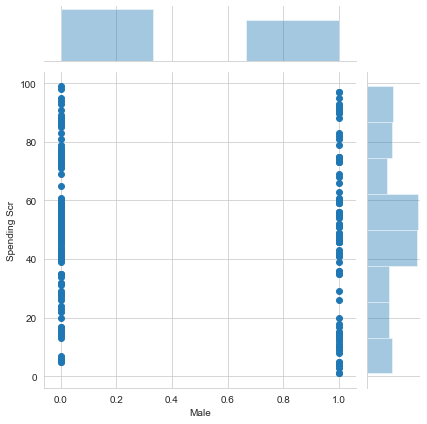

In [28]:
sns.jointplot(x = 'Male', y = 'Spending Scr', data = cust)

C:\Users\rusal\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


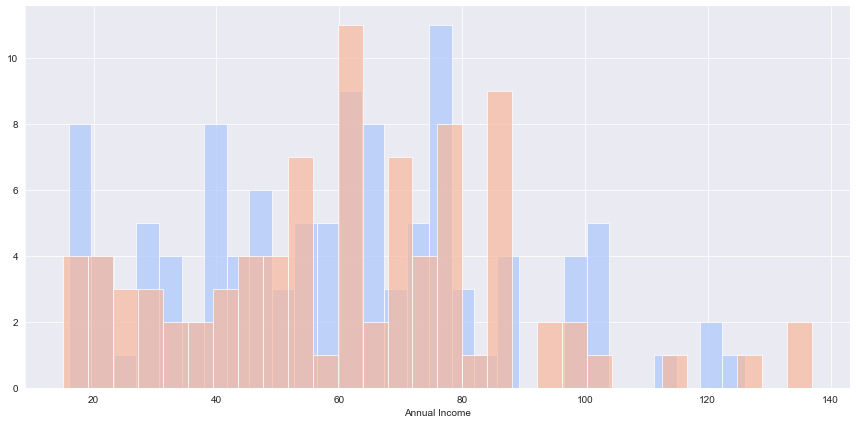

In [29]:
sns.set_style('darkgrid')
g = sns.FacetGrid(cust,hue='Male',palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Annual Income',bins=30,alpha=0.7)

#### Here the Blue and Pink shades represent Male and Female respectively. So we can see that except for a few outliers, Females have a comparatively lower Annual Income than Males. Further below, we shall see a similar trend in cases of Spending Score and Age.

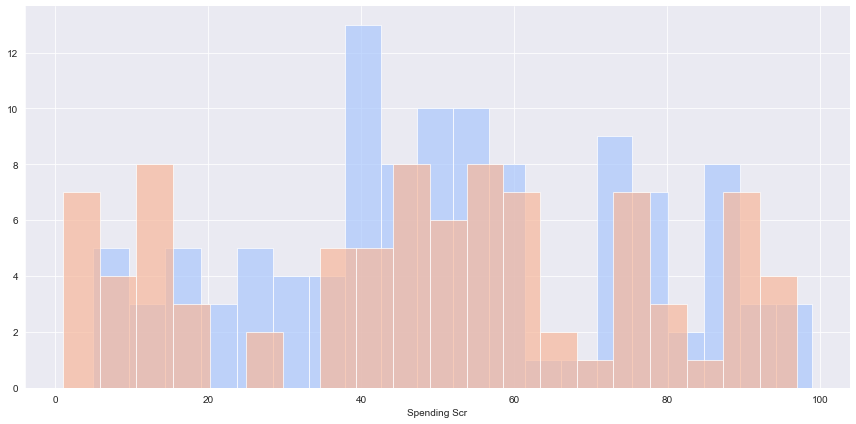

In [30]:
g = sns.FacetGrid(cust,hue='Male',palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Spending Scr',bins=20,alpha=0.7)

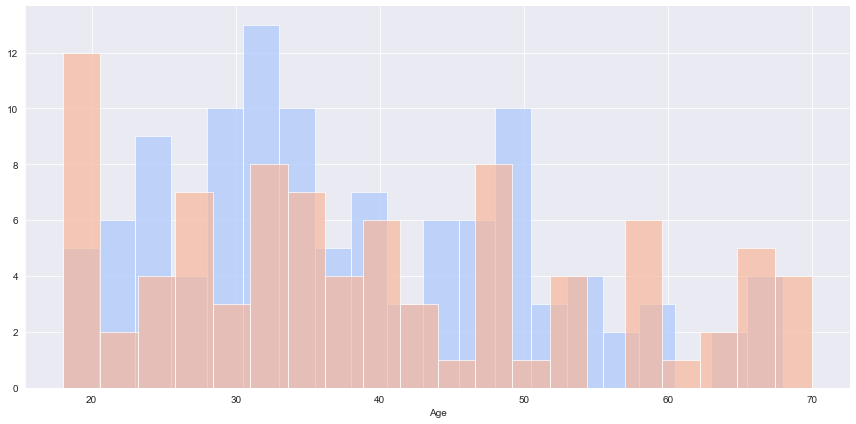

In [31]:
g = sns.FacetGrid(cust,hue='Male',palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Age',bins=20,alpha=0.7)

### K MEANS CLUSTERING

In [32]:
from sklearn.cluster import KMeans

In [33]:
from sklearn import metrics

#### We now use the elbow method to determine the optimal number of K clusters required by the algorithm.

In [34]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(cust)
    distortions.append(kmeanModel.inertia_)
    

Text(0.5, 1.0, 'Elbow Method showing Optimal K value')

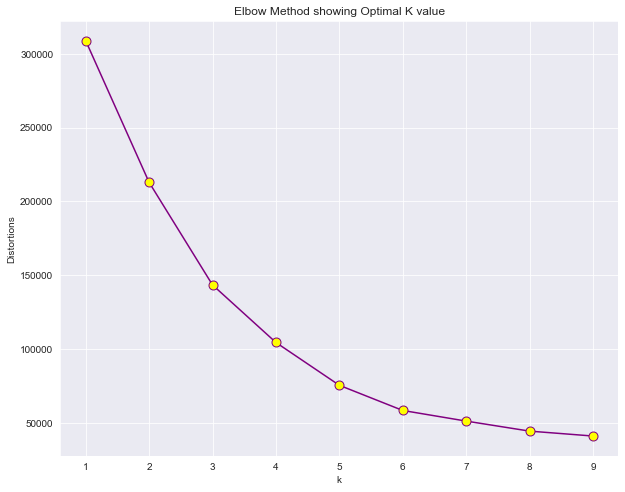

In [35]:
plt.figure(figsize = (10,8))
plt.plot(K,distortions, color = 'purple', marker = 'o', markersize = 9, markerfacecolor = 'yellow')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method showing Optimal K value')



#### It therefore seems that 5 clusters will be a good fit. 

In [36]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(cust)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
kmeanModel.labels_

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [38]:
cust.head()

,Age,Annual Income,Spending Scr,Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


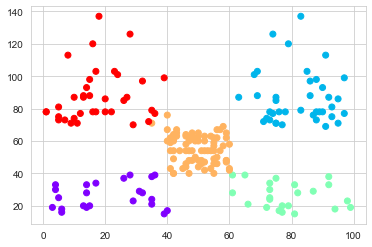

In [42]:
sns.set_style('whitegrid')
plt.scatter(cust['Spending Scr'],cust['Annual Income'], c=kmeanModel.labels_,cmap='rainbow')

#### So, we see 5 clusters fit perfectly well considering Spending Score and Annual Income. We now see the other cases.

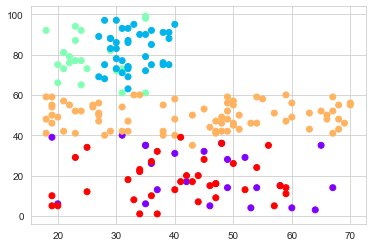

In [43]:
plt.scatter(cust['Age'],cust['Spending Scr'], c=kmeanModel.labels_,cmap='rainbow')

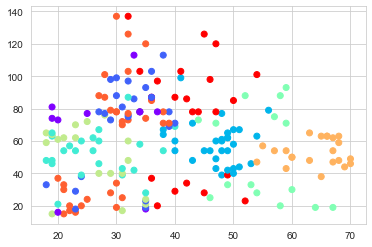

In [47]:
plt.scatter(cust['Age'],cust['Annual Income'], c=kmeanModel.labels_,cmap='rainbow')

#### However, we see that 5 clusters is not a perfect fit conisdering Age and Spending Score as well as for Age and Annual Income. So, we again use the elbow method to find out the appropriate number of custers for those cases. 

In [48]:
distortions = []
cust_1 = cust[['Age', 'Spending Scr']].iloc[:,:].values
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(cust_1)
    distortions.append(kmeanModel.inertia_)
    

Text(0.5, 1.0, 'Elbow Method showing Optimal K value')

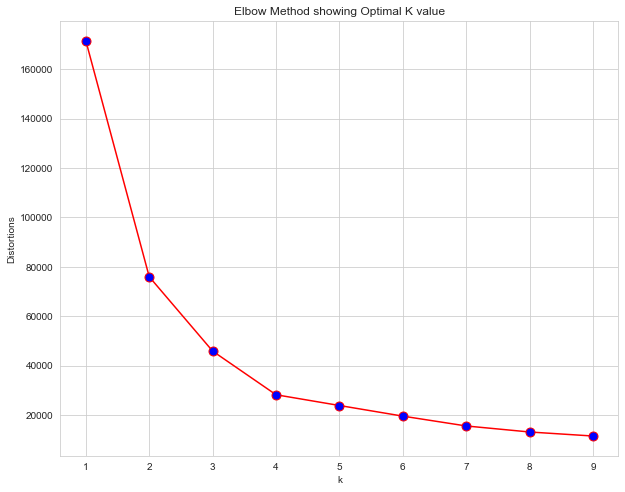

In [49]:
plt.figure(figsize = (10,8))
plt.plot(K,distortions, color = 'red', marker = 'o', markersize = 9, markerfacecolor = 'blue')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method showing Optimal K value')


#### Elbow forms at 4 number of clusters.

In [50]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(cust_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

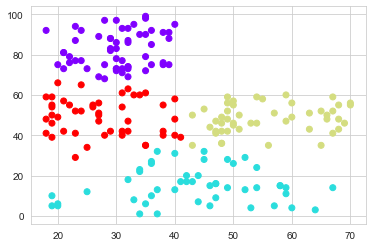

In [51]:
plt.scatter(cust['Age'],cust['Spending Scr'], c=kmeanModel.labels_,cmap='rainbow')

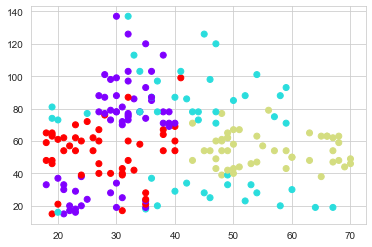

In [55]:
plt.scatter(cust['Age'],cust['Annual Income'], c=kmeanModel.labels_,cmap='rainbow')

#### It is therfore seen that 4 clusters fit well for Age and Spending Score. However, we deploy the elbow method once again to improve the cluster formation for Age and Annual Income. 

In [56]:
distortions = []
cust_2 = cust[['Age', 'Annual Income']].iloc[:,:].values
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(cust_2)
    distortions.append(kmeanModel.inertia_)
    

Text(0.5, 1.0, 'Elbow Method showing Optimal K value')

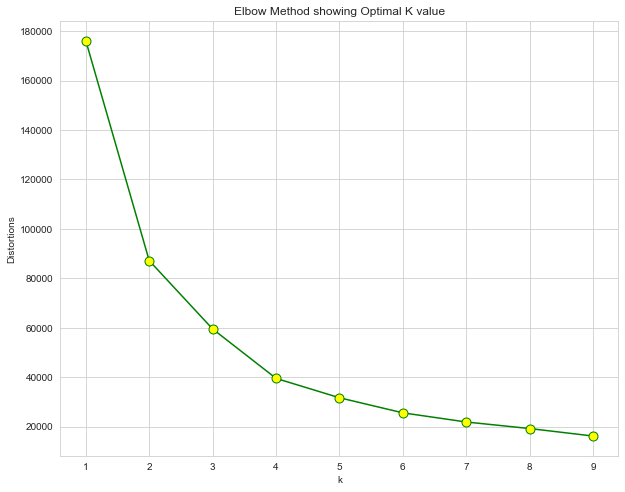

In [57]:
plt.figure(figsize = (10,8))
plt.plot(K,distortions, color = 'green', marker = 'o', markersize = 9, markerfacecolor = 'yellow')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method showing Optimal K value')


#### Elbow at 6 number of clusters.

In [58]:
kmeanModel = KMeans(n_clusters=6)
kmeanModel.fit(cust_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

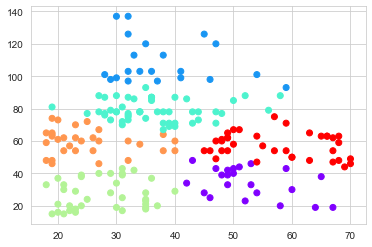

In [59]:
#plt.figure(figsize = (9,7))
plt.scatter(cust['Age'],cust['Annual Income'], c=kmeanModel.labels_,cmap='rainbow')

#### Therefore, we see that 6 clusters is an even better fit for Age and Annual Income.

## THANK YOU!